In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parametros

a = 1 
b = 1
d = 1
g = 1

#condicoes iniciais 

x0 = 2
y0 = 1

#tempo  passo de tempo
tf = 20 #tempo final 
h = 0.01 #passo de tempo 
t = np.arange(0, tf+h, h) #array com os pontos de tempo


In [3]:
def sistemaDeEquacoes(estado):
    x, y = estado
    dxdt = a*x - b*y*x #presa
    dydt = d*x*y - g*y #predador
    return np.array([dxdt, dydt])

In [4]:
def metodoDeEuler(funcao,y0,t,h):
    n = len(t)
    solucaoEuler = np.zeros((n,len(y0))) # Matriz para armazenar as soluções com dimensão (n, 2)
    solucaoEuler[0] = y0
    for i in range(n-1):
        derivadas = funcao(solucaoEuler[i])
        solucaoEuler[i+1] = solucaoEuler[i] + h * derivadas

    return solucaoEuler

In [5]:
def metodoDeRungeKutta(funcao,y0,t,h):
    n = len(t)
    solucaoRK = np.zeros((n,len(y0)))
    solucaoRK[0] = y0 
    for i in range(n-1):
        k1 = funcao(solucaoRK[i])
        k2 = funcao(solucaoRK[i] + 0.5*h*k1)
        k3 = funcao(solucaoRK[i] + 0.5*h*k2)
        k4 = funcao(solucaoRK[i] + h*k3)
        solucaoRK[i+1] = solucaoRK[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return solucaoRK

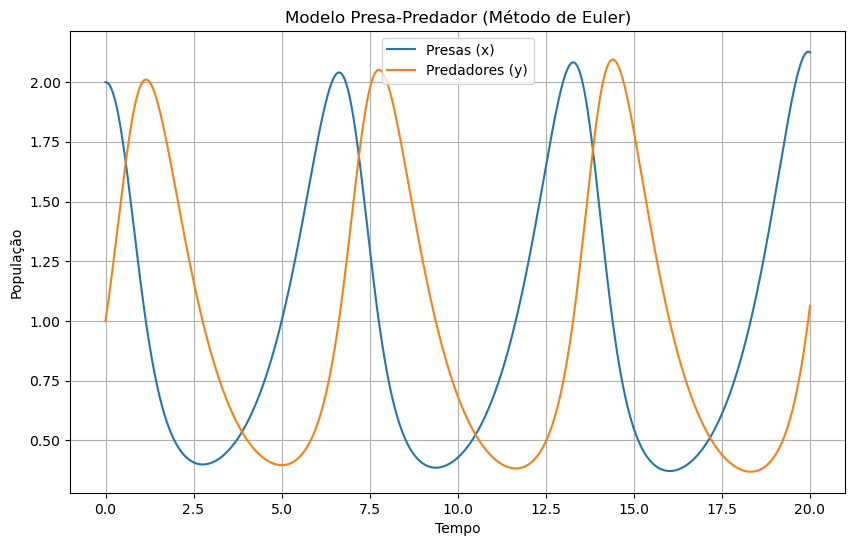

In [6]:
plt.figure(figsize=(10,6))
plt.grid(True)
solucao = metodoDeEuler(sistemaDeEquacoes, [x0, y0], t, h)
plt.plot(t, solucao[:,0], label='Presas (x)') #solucao[:,0] = todas as presas ao longo do tempo para cada tempo t
plt.plot(t, solucao[:,1], label='Predadores (y)') #solucao[:,1] = todos os predadores ao longo do tempo para cada tempo t
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo Presa-Predador (Método de Euler)')
plt.show()

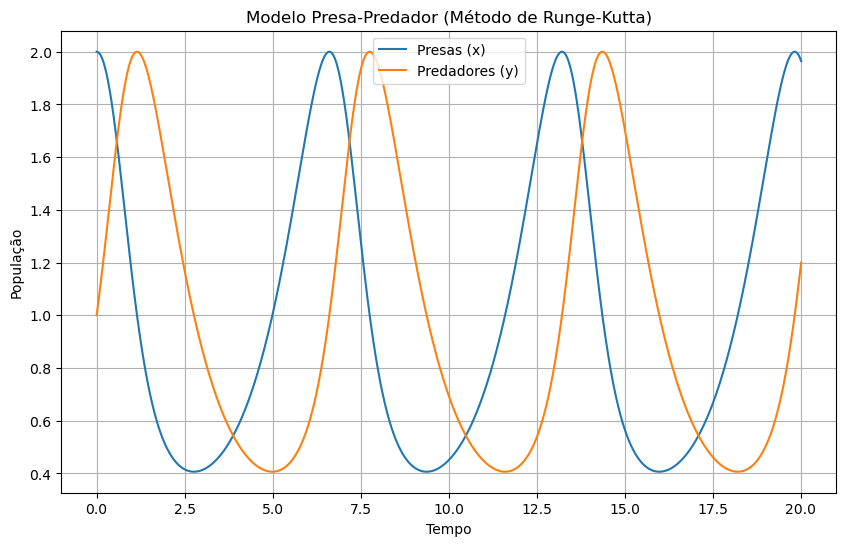

In [7]:
plt.figure(figsize=(10,6))
plt.grid(True)
solucao = metodoDeRungeKutta(sistemaDeEquacoes, [x0, y0], t, h)
plt.plot(t, solucao[:,0], label='Presas (x)')
plt.plot(t, solucao[:,1], label='Predadores (y)')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo Presa-Predador (Método de Runge-Kutta)')
plt.show()  

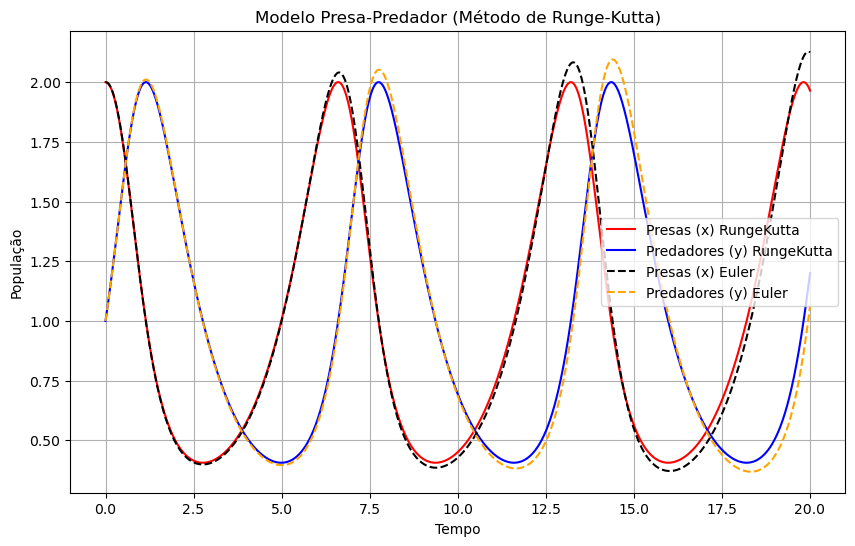

In [14]:
plt.figure(figsize=(10,6))
plt.grid(True)
solucaoRungeKutta = metodoDeRungeKutta(sistemaDeEquacoes, [x0, y0], t, h)
solucaoEuller = metodoDeEuler(sistemaDeEquacoes,[x0, y0], t, h)
plt.plot(t, solucaoRungeKutta[:,0], label='Presas (x) RungeKutta',color = 'red')
plt.plot(t, solucaoRungeKutta[:,1], label='Predadores (y) RungeKutta' , color ='blue')
plt.plot(t, solucaoEuller[:,0], label='Presas (x) Euler',color = 'black' , linestyle = '--')
plt.plot(t, solucaoEuller[:,1], label='Predadores (y) Euler' , color ='orange' , linestyle = '--')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo Presa-Predador (Método de Runge-Kutta)')
plt.show()  